# Required Modules:

In [1]:
import heapq
import networkx as nx

# Simple Graph Implementation:

In [2]:
class Graph:
    
    def __init__(self):
        self.graph = {}

    def add_edge(self, node, neighbor, cost=None):
        if node not in self.graph:
            self.graph[node] = []
        if cost is not None:
            self.graph[node].append((neighbor, cost))
        else:
            self.graph[node].append(neighbor)

# Uniform Cost Search :

In [3]:
def uniform_cost_search(graph, start, goal):
    visited = set()
    priority_queue = [(0, start, [])]

    while priority_queue:
        (cost, current, path) = heapq.heappop(priority_queue)

        if current in visited:
            continue

        visited.add(current)
        path = path + [current]

        if current == goal:
            return path, cost  # Return both path and cost

        for neighbor_info in graph.graph.get(current, []):
            if isinstance(neighbor_info, tuple):
                neighbor, neighbor_cost = neighbor_info
            else:
                neighbor, neighbor_cost = neighbor_info, 1  # Default cost if not provided

            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + neighbor_cost, neighbor, path))

    return None, None  # Return None if no path is found

# Example 1 :

In [4]:
graph = Graph()
graph.add_edge('S', 'A', 1)
graph.add_edge('S', 'G', 12)
graph.add_edge('A', 'B', 3)
graph.add_edge('A', 'C', 1)
graph.add_edge('B', 'D', 3)
graph.add_edge('B', 'D', 1)  # Double edge between B and D
graph.add_edge('C', 'G', 2)
graph.add_edge('D', 'G', 3)
graph.add_edge('D', 'G', 3)  # Double edge between D and G

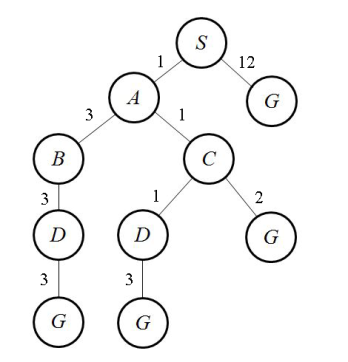

In [5]:
from IPython.display import Image, display
image_path = r'searchtree.jpg'
display(Image(filename=image_path))

In [6]:
start_node = 'S'
goal_node = 'G'
result_path, result_cost = uniform_cost_search(graph, start_node, goal_node)

In [7]:
if result_path:
    print(f"Uniform Cost Search path from {start_node} to {goal_node}: {result_path}")
    print(f"Cost: {result_cost}")
else:
    print(f"No path found from {start_node} to {goal_node}")

Uniform Cost Search path from S to G: ['S', 'A', 'C', 'G']
Cost: 4
